# HW4 Pandas

https://mlcourse.ai/book/topic02/assignment02_analyzing_cardiovascular_desease_data.html#part-2-visual-data-analysis-a-class-tocskip

## Part 1

In [ ]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [ ]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


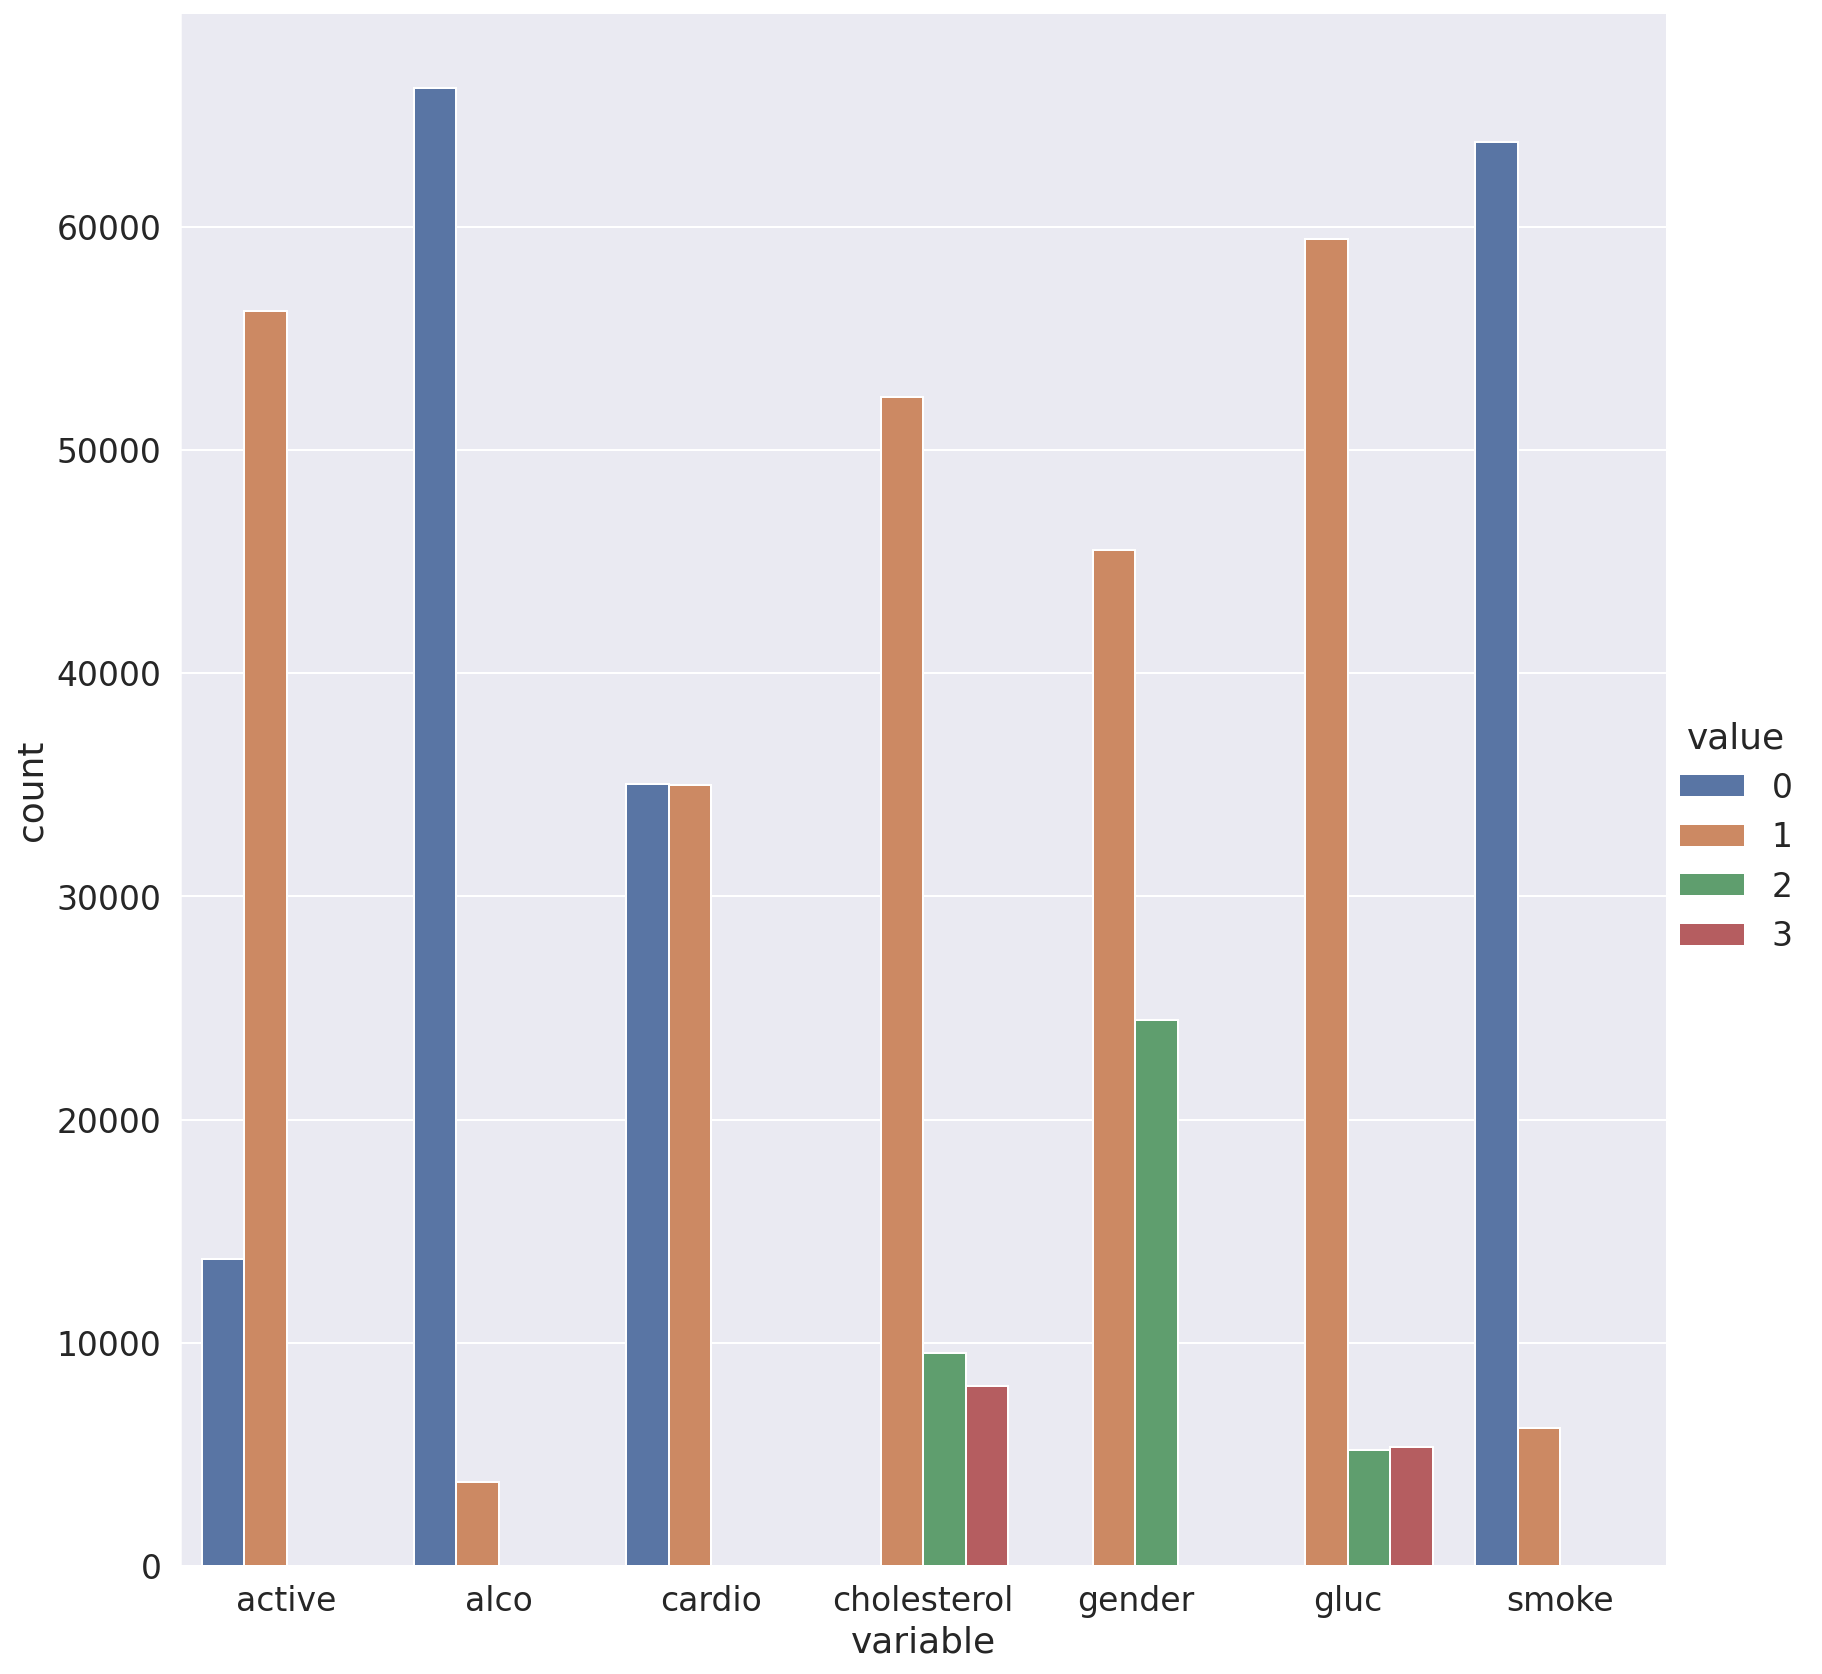

In [ ]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

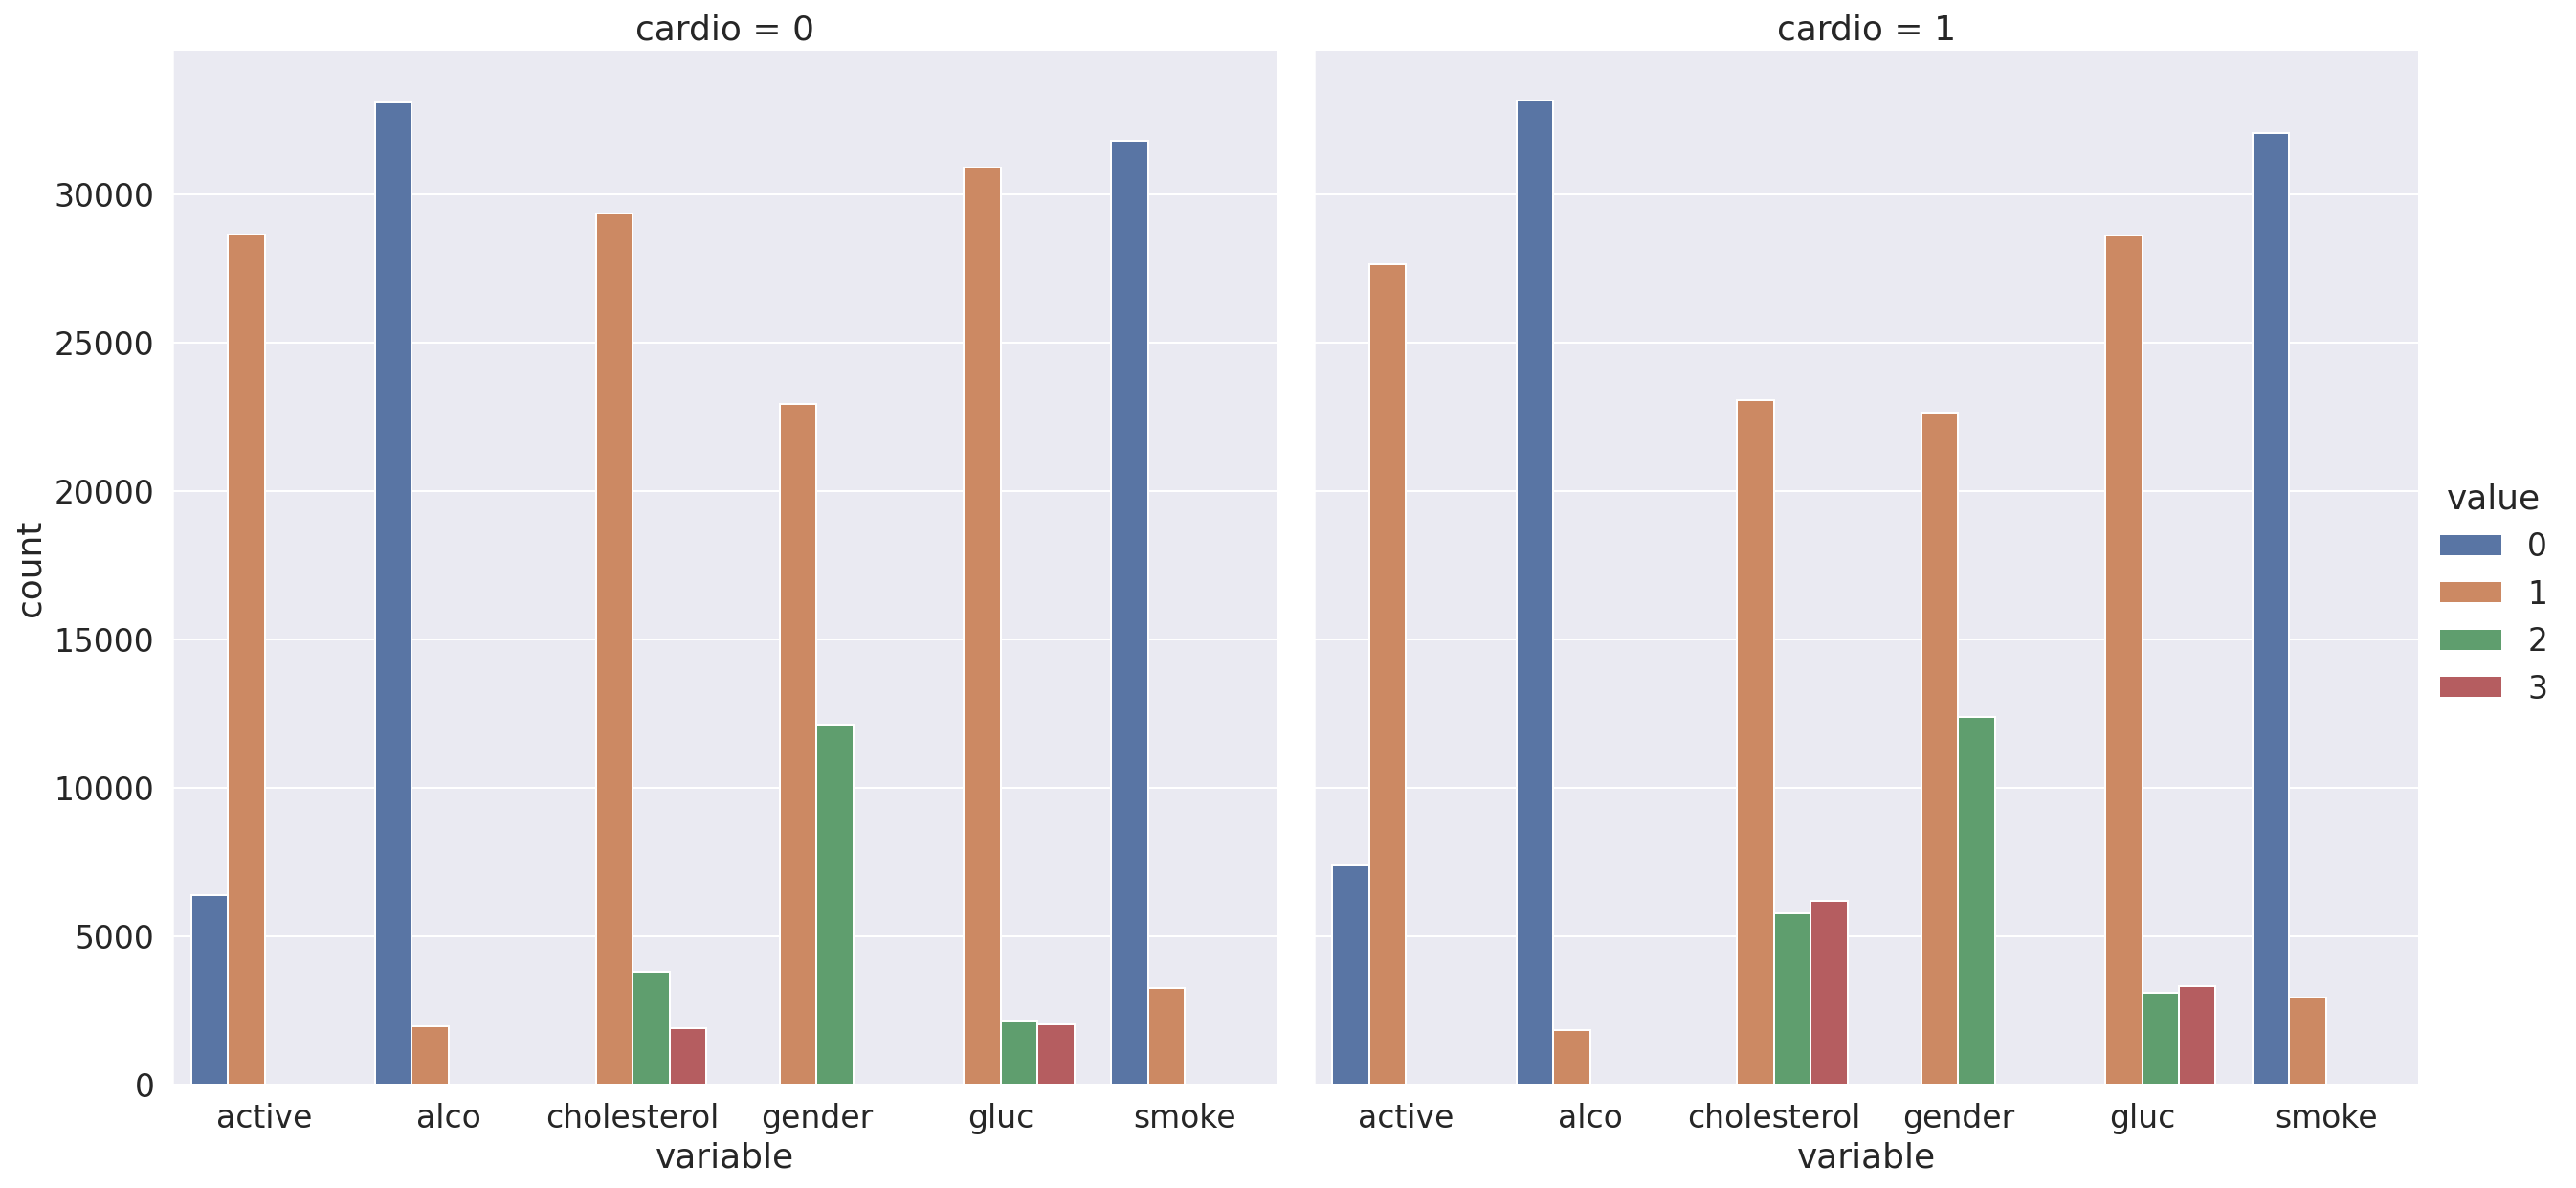

In [ ]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
    size=9,
);

In [ ]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## 1.1. Basic observations

#### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.
1. **45530 women and 24470 men**

2. 45530 men and 24470 women

3. 45470 women and 24530 men

4. 45470 men and 24530 women

In [ ]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

**Answer: 1. 45530 women and 24470 men**

#### Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?
1. women
2. **men**

In [ ]:
df.groupby("gender")["alco"].mean()


gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

**Answer: 2. men**

#### Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?
1. 4

2. 16

3. **20**

4. 24

In [ ]:
woman=((df[(df["gender"]==1)&(df["smoke"]==1)]["smoke"].count())/df[df["gender"]==1]["gender"].count())
       
men=((df[(df["gender"]==2)&(df["smoke"]==1)]["smoke"].count())/df[df["gender"]==2]["gender"].count())
per_dif=(men-woman)*100
round(per_dif)


20

**Answer: 3. 20**

#### Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You’ll need to figure out the units of feature age in this dataset.
1. 5

2. 10

3. 15

4. **20**

In [ ]:
median_dif=(df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median() )/ 365 
median_dif

1.6356164383561644

In [ ]:
round(median_dif*12)

20

**Answer: 4. 20**

## 1.2. Risk maps

#### Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?
1. 1

2. 2

3. **3**

4. 4

In [ ]:
df["age_years"] = (df["age"] / 365).round().astype("int")

In [ ]:
age_years_men = df[(df["gender"] == 2)& (df["age_years"]>=60)&(df["age_years"]<65)&(df["smoke"]==1)]
age_years_men


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69697,99551,23224,2,151,45.0,120,70,3,1,1,1,0,1,64
69699,99553,23183,2,178,113.0,130,90,2,2,1,0,1,1,64
69814,99711,22759,2,167,76.0,120,80,1,1,1,0,1,0,62
69857,99775,22637,2,177,63.0,150,70,1,1,1,0,1,1,62


In [ ]:
a=age_years_men[(age_years_men["cholesterol"] == 1) & (age_years_men["ap_hi"] < 120)]["cardio"].mean()
a

0.2564102564102564

In [ ]:
#[160,180)
b=age_years_men[(age_years_men["cholesterol"] == 3) & (age_years_men["ap_hi"] >= 160)& (age_years_men["ap_hi"] < 180)]["cardio"].mean()
b

0.8636363636363636

In [ ]:
round(b/a)

3

**Answer: 3. 3**

## 1.3. Analyzing BMI

#### Question 1.6. (2 points). Choose the correct statements:
* Median BMI in the sample is within the range of normal BMI values.

* **The BMI for women is on average higher than for men.**

* Healthy people have, on average, a higher BMI than the people with CVD.

* **For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women**

In [ ]:
df["BMI"]=df["weight"] /((df["height"]/100)**2) 


In [ ]:
#first statement is not true
df["BMI"].median()

26.374068120774975

In [ ]:

df[df["gender"]==1]["BMI"].mean()

27.98758344183312

In [ ]:
# second statement is true
df[df["gender"]==2]["BMI"].mean()

26.754442357289474

In [ ]:
#third not true
#fourth is true
df.groupby(["gender", "alco", "cardio"])["BMI"].median()

gender  alco  cardio
1       0     0         25.654372
              1         27.885187
        1     0         27.885187
              1         30.110991
2       0     0         25.102391
              1         26.674874
        1     0         25.351541
              1         27.530797
Name: BMI, dtype: float64

**Answer: 2. The BMI for women is on average higher than for men.**

**Answer: 4. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women.**

## 1.4. Cleaning data

#### Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?
* 8

* 9

* **10**

* 11

In [ ]:

new_df= df[(df["ap_lo"] > df["ap_hi"])|(df["height"] < df["height"].quantile(0.025))|(df["height"] > df["height"].quantile(0.975))|(df["weight"] < df["weight"].quantile(0.025))|(df["weight"] > df["weight"].quantile(0.975))]
percent_new=round((new_df.shape[0] / df.shape[0])*100)
percent_new


10

**Answer: 3. 10**

## **Part 2**

## 2.1. Correlation matrix visualization

#### Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?
* Cardio, Cholesterol

* **Height, Smoke**

* Smoke, Alco

* Height, Weight

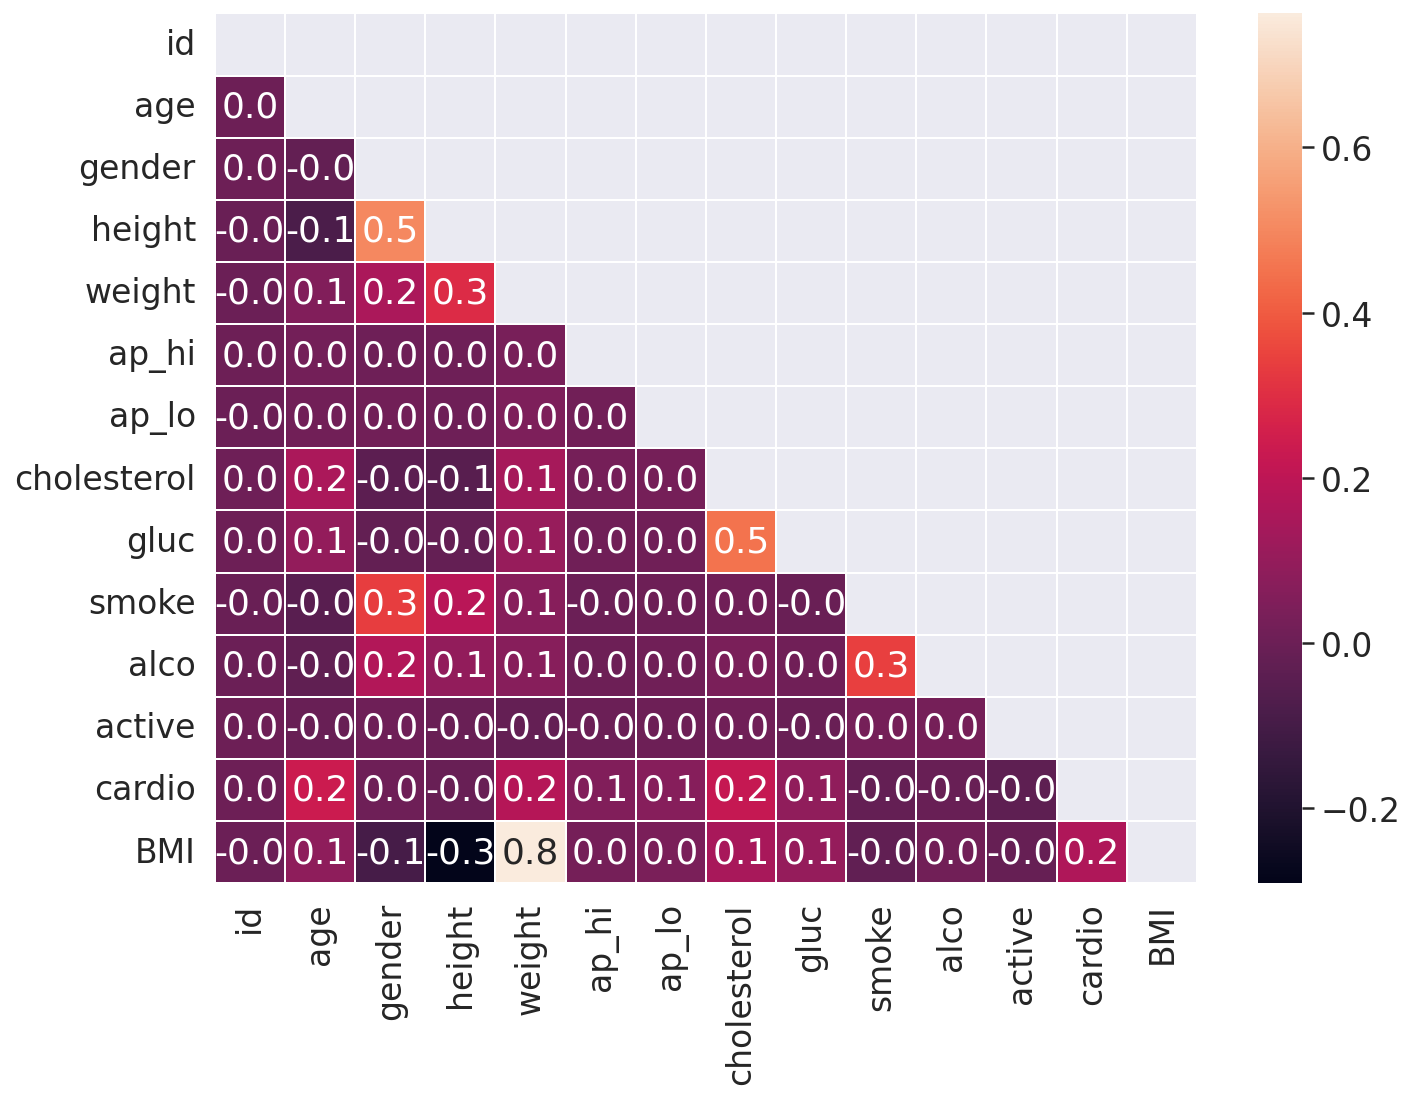

In [ ]:
corr_matrix = df.corr(method="pearson")
trio = np.zeros_like(corr_matrix, dtype=np.bool)
trio[np.triu_indices_from(trio)] = True
sns.heatmap(corr_matrix,mask = trio, annot=True, fmt=".1f", linewidths=.5)

2. Height, Smoke

## 2.2. Height distribution of men and women
#### Create a violin plot for the height and gender using `violinplot()`. Use the parameters:

* hue to split by gender;

* scale to evaluate the number of records for each gender.



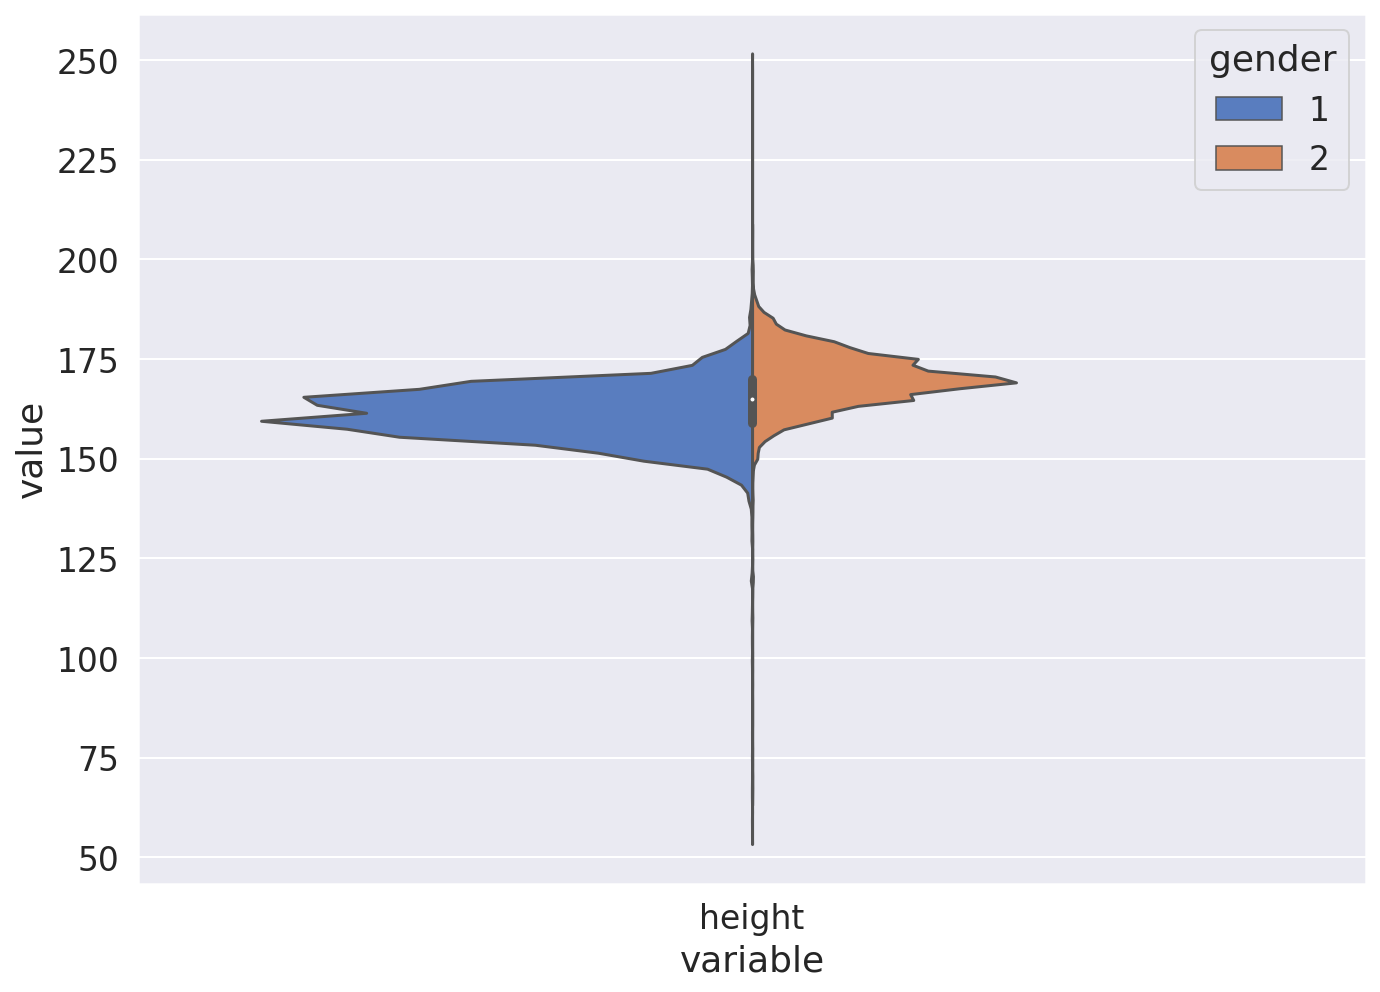

In [ ]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

ax = sns.violinplot(x='variable', y='value', hue='gender', data=df_melt, split=True, scale='count', scale_hue=False )

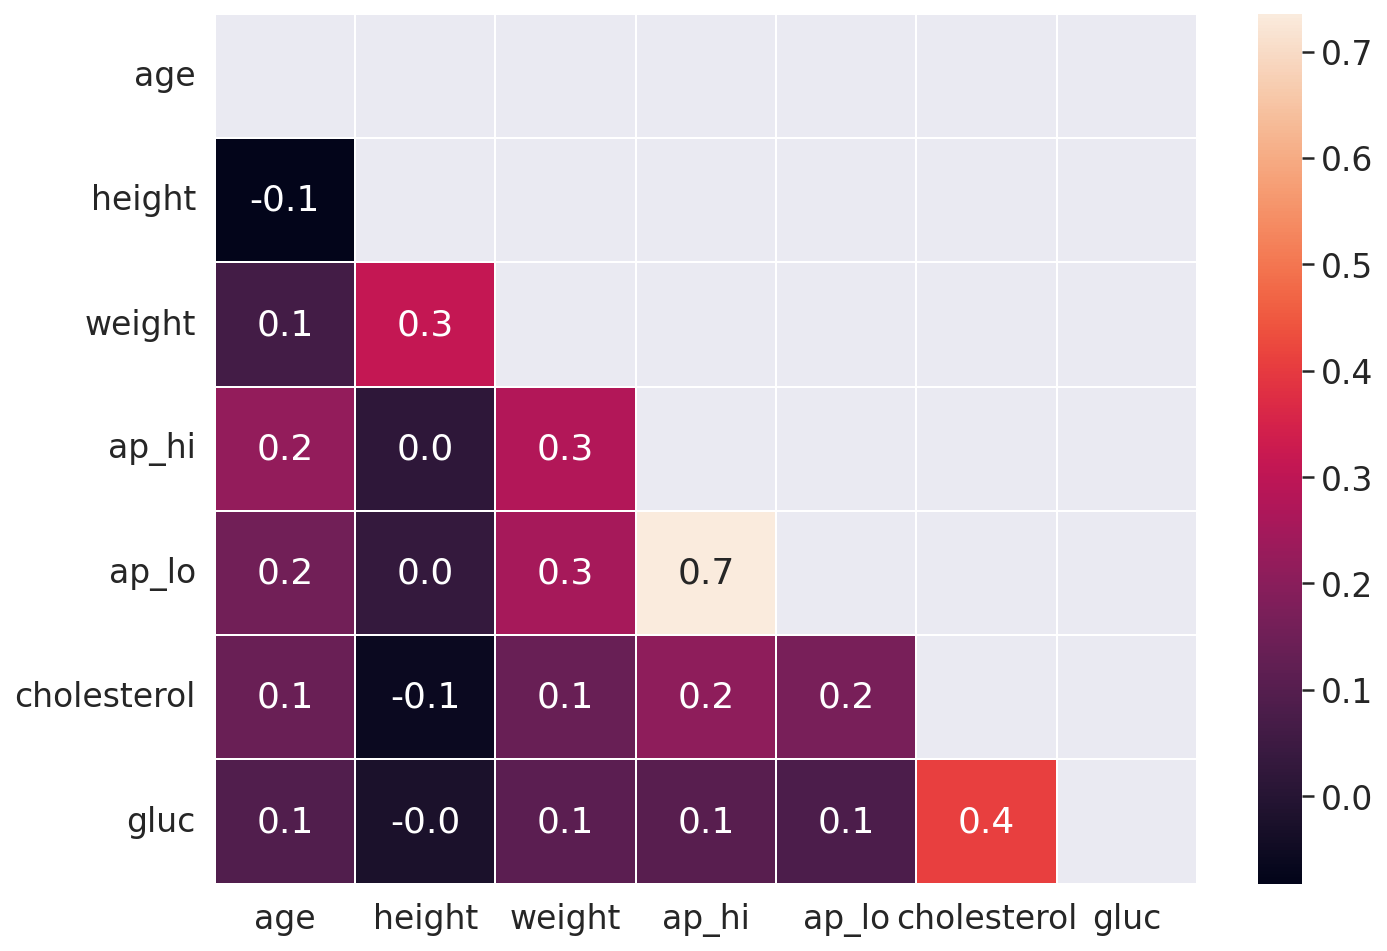

In [ ]:
corr_matrix2 = df[['age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

trio2 = np.zeros_like(corr_matrix2, dtype=np.bool)
trio2[np.triu_indices_from(trio2)] = True

sns.heatmap(corr_matrix2, mask=trio2, annot=True, fmt=".1f", linewidths=.5)

## 2.3. Rank correlation

#### Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

1. Height, Weight

2. Age, Weight

3. Cholesterol, Gluc

4. Cardio, Cholesterol

5. **Ap_hi, Ap_lo**

6. Smoke, Alco

**Answer: 5. Ap_hi, Ap_lo**

#### Question 2.3. (1 point). Why do these features have strong rank correlation?

* Inaccuracies in the data (data acquisition errors).

* Relation is wrong, these features should not be related.

* **Nature of the data.**

<br>

**Answer: 3. Nature of the data.**

## 2.4. Age

#### Task:Create a count plot using `countplot()` with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

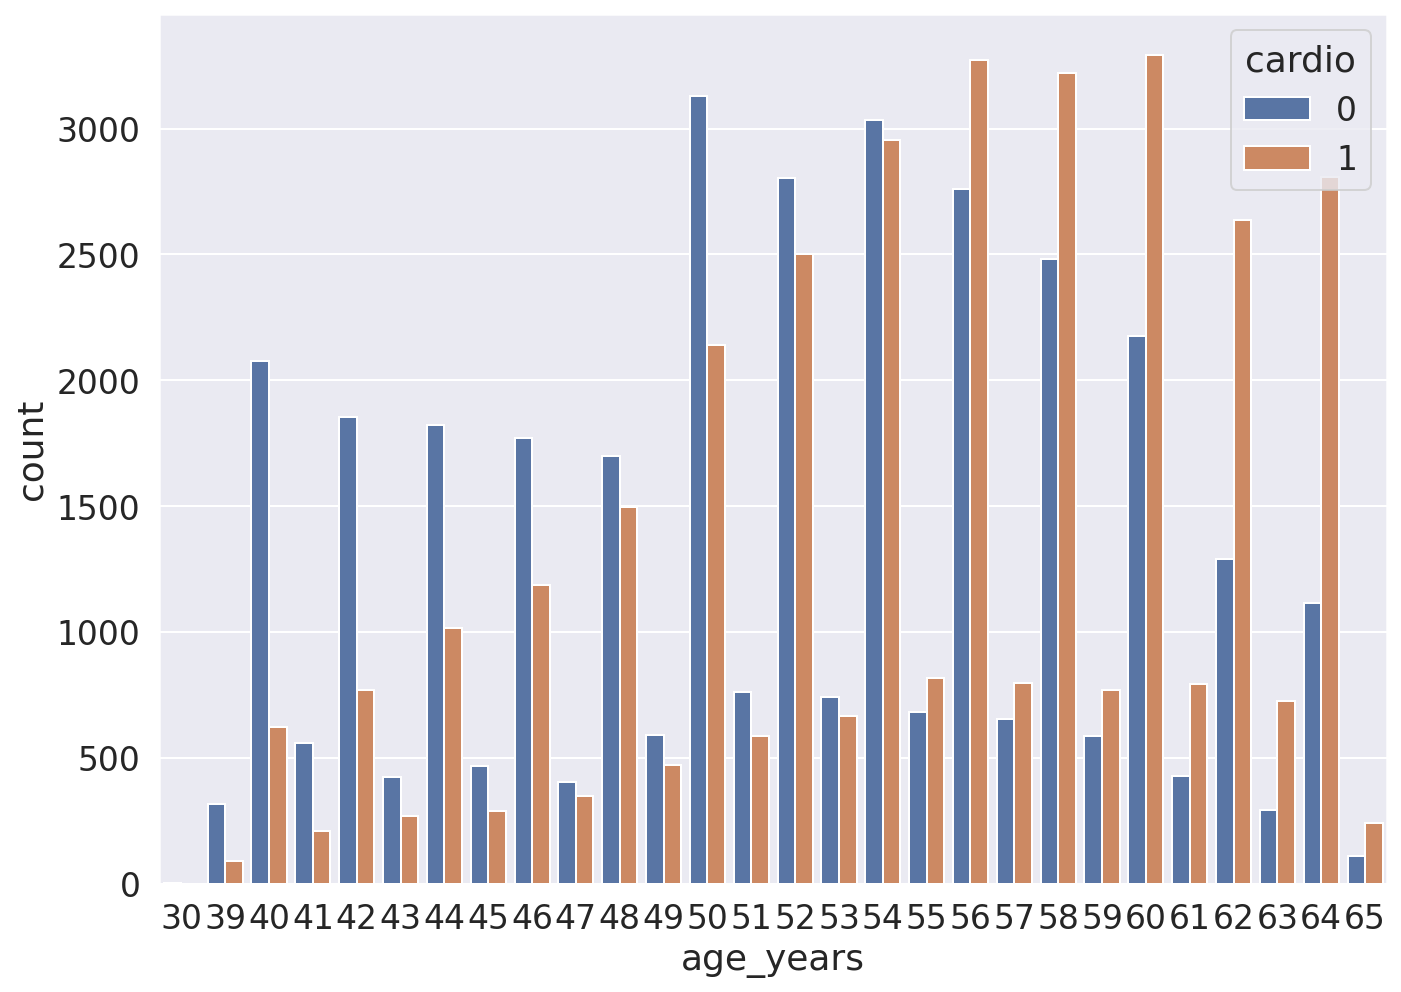

In [ ]:
sns.countplot(x="age_years", hue='cardio', data=df)

#### Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

1. 44

2. **55**

3. 64

4. 70

**Answer: 2. 55**